In [17]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine, text
import matplotlib.pyplot as plt

instruments = ['hc', 'rb', 'i', 'j', 'jm', 'au', 'ag', 'v', 'ru', 'l', 'pp', 'bu', 'TA', 'FG', 'MA',
               'y', 'p', 'm', 'a', 'c', 'cs', 'jd', 'RM', 'CF', 'SR', 'OI']
start_date = 20180101
table = "AdjustedFuturesDaily"
engine = create_engine("sqlite:///../data/FuturesMarketData.db")
in_binds = ", ".join([f":sym{i}" for i in range(len(instruments))])
sql = text(f"""
    SELECT *, (ClosePrice * factor_multiply) as adjclose
    FROM {table}
    WHERE TradingDay >= :start
    AND Instrument IN ({in_binds})
""")

params = {"start": start_date} | {f"sym{i}": s for i, s in enumerate(instruments)}

with engine.begin() as conn:
    df = pd.read_sql(sql, conn, params=params)
df

,Instrument,Contract,MaturityMonth,Exchange,TradingDay,ClosePrice,HighestPrice,LowestPrice,OpenInterest,OpenPrice,SettlementPrice,TotalVolume,Turnover,history_factor,lag,factor_multiply,method,adjclose
0,ag,1806,222,SHFE,20180102,3902.0,3910.0,3891.0,602744.0,3899.0,3900.0,137022.0,8.016266e+09,1.0,0.0,0.813637,OpenInterest,3174.812591
1,ag,1806,222,SHFE,20180103,3897.0,3928.0,3897.0,583810.0,3908.0,3911.0,323606.0,1.898892e+10,1.0,0.0,0.813637,OpenInterest,3170.744405
2,ag,1806,222,SHFE,20180104,3885.0,3915.0,3871.0,595966.0,3902.0,3890.0,379448.0,2.214381e+10,1.0,0.0,0.813637,OpenInterest,3160.980758
3,ag,1806,222,SHFE,20180105,3890.0,3910.0,3875.0,584178.0,3889.0,3895.0,330302.0,1.930230e+10,1.0,0.0,0.813637,OpenInterest,3165.048944
4,ag,1806,222,SHFE,20180108,3891.0,3912.0,3881.0,595602.0,3888.0,3896.0,348074.0,2.034266e+10,1.0,0.0,0.813637,OpenInterest,3165.862581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12657,m,2005,245,DCE,20191231,2772.0,2790.0,2766.0,3385712.0,2777.0,2773.0,2045228.0,5.673458e+10,1.0,0.0,2.537433,OpenInterest,7033.765424
12658,p,2005,245,DCE,20191231,6362.0,6404.0,6294.0,1616246.0,6350.0,6352.0,4108128.0,2.609591e+11,1.0,0.0,0.565741,OpenInterest,3599.244488
12659,pp,2005,245,DCE,20191231,7582.0,7650.0,7556.0,610838.0,7640.0,7594.0,603454.0,2.291524e+10,1.0,0.0,1.996700,OpenInterest,15138.979927
12660,v,2005,245,DCE,20191231,6525.0,6540.0,6505.0,465248.0,6540.0,6520.0,170576.0,5.562639e+09,1.0,0.0,0.798231,OpenInterest,5208.458237


In [18]:
df['TradingDay'] = pd.to_datetime(df['TradingDay'].astype(str))
df = df.sort_values(['Instrument', 'TradingDay']).drop_duplicates(['Instrument', 'TradingDay'], keep='last')
cols_keep = ['TradingDay', 'Instrument', 'adjclose']
df = df[cols_keep]
df

,TradingDay,Instrument,adjclose
2154,2018-01-02,CF,14723.312083
2155,2018-01-03,CF,14644.996593
2156,2018-01-04,CF,14693.943774
2157,2018-01-05,CF,14850.574754
2158,2018-01-08,CF,14855.469472
...,...,...,...
12557,2019-12-25,y,4430.568014
12583,2019-12-26,y,4456.201629
12609,2019-12-27,y,4565.481778
12635,2019-12-30,y,4562.783503


Text(0, 0.5, 'Price')

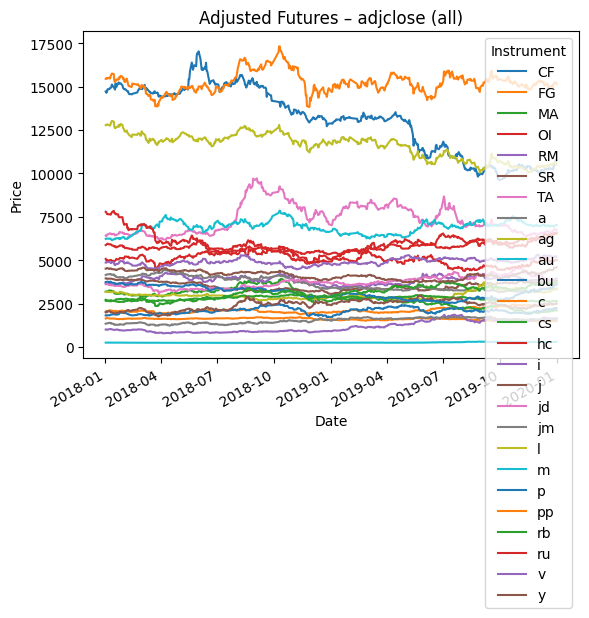

In [19]:
adj = (df
       .pivot_table(index='TradingDay',
                    columns='Instrument',
                    values='adjclose',
                    aggfunc='last')
       .sort_index()
       .sort_index(axis=1))

ax = adj.plot(title='Adjusted Futures – adjclose (all)')
ax.set_xlabel('Date'); ax.set_ylabel('Price')

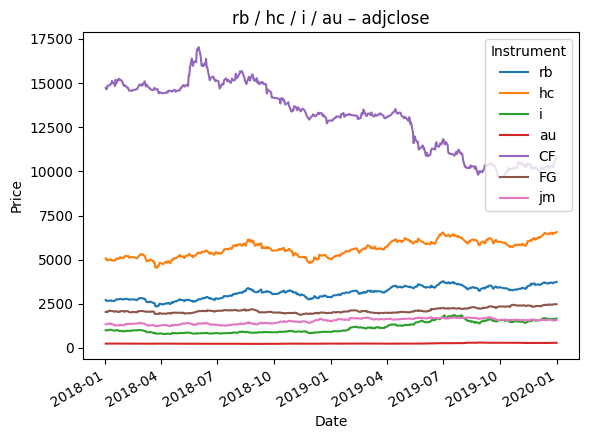

In [20]:
subset = ['rb','hc','i','au', 'CF', 'FG', 'jm']
adj[subset].dropna(how='all').plot(title='rb / hc / i / au – adjclose')
plt.xlabel('Date'); plt.ylabel('Price')
plt.show()